# Take home exam 01

#### 4a) Show, by iterating two close initial conditions, that this map is chaotic.
$$
x_{n+1} = f (x_n) = (2x_n − 1)^3,\text{ for } x_n \in [−1, 1].
$$

In [1]:
# Libraries
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# Plot style
plt.style.use(['science', 'nature', 'high-vis'])

In [3]:
# Function
def map_4(x0, iter):

    # Initialize
    x = [x0]

    # Iterate
    for i in range(iter + 1):
        
        # Compute
        next = (2 * x[i] - 1)**3

        # Append
        x.append(next)

    return x
        

In [4]:
# Initial conditions
x0_array = np.linspace(0.999_999_999, 1, 10)

In [5]:
# Evolution and initial conditions
evolutions = []
initial_conditions = []

# Counter 
counter = 0

# Iterate over initial conditions
for x0 in x0_array:

    try:
        # Compute the map
        x = map_4(x0, 13)

        # Counter
        counter += 1

        # No infinite or NaN values
        if np.any(np.isinf(x)) or np.any(np.isnan(x)):
            continue

        # Append
        evolutions.append(x)
        initial_conditions.append(x0)

    except:
        print(f"Error with x0 = {x0}")
        continue

In [6]:
# Pick a valid pair
two_evolutions = evolutions[-3:-1]
two_initial_conditions = initial_conditions[-3:-1]

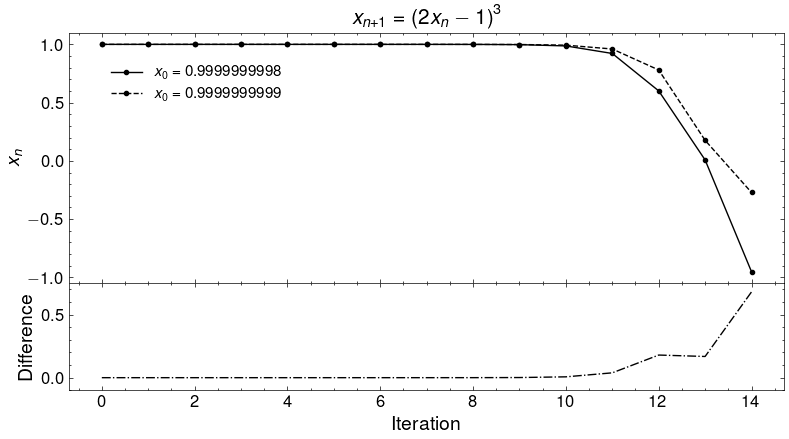

In [7]:
# Two panel plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4.5), sharex=True,
                               gridspec_kw={'hspace': 0, 'height_ratios': [7, 3]})

ax1.set_title(r"$x_{n+1}=\left(2x_n-1\right)^3$", fontsize=15)
ax1.set_ylabel(r"$x_n$", fontsize=14)

# Plots
ax1.plot(range(len(two_evolutions[0])), two_evolutions[0],
         label=r'$x_0=$' + f" {two_initial_conditions[0]:.10f}",
         marker='o', color='k')
ax1.plot(range(len(two_evolutions[1])), two_evolutions[1],
         label=r'$x_0=$' + f" {two_initial_conditions[1]:.10f}",
         marker='o', color='k', ls='--')

ax1.legend(loc=(0.05, 0.70), fontsize=11)
ax1.tick_params(axis='both', labelsize=12)

# Difference
difference = np.abs(np.array(two_evolutions[0]) - np.array(two_evolutions[1]))
ax2.plot(range(len(difference)), difference, color='k', ls = "-.")
ax2.set_xlabel("Iteration", fontsize=14)
ax2.set_ylabel("Difference", fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.set_ylim(-0.1, 0.75)

plt.tight_layout()
#plt.savefig("4b.pdf", bbox_inches='tight', dpi=300)
plt.subplots_adjust(hspace=0)
plt.show()

#### 5a) Bifurcation diagram of $x_n \in [-1,1]$ as a function of $r$.

$$
x_{n+1} = f(x_n) = \sin^2(r \arcsin(\sqrt{x_n})),\text{ for } r \in [1, 4].
$$

In [8]:
# Optimized function
@jit(nopython = True)
def sine_map(x, r):
    return np.sin(r * np.arcsin(np.sqrt(x))) ** 2

In [9]:
# Function
def bifurcation_diagram(r_min = 1.0,
                        r_max = 2.0,
                        r_steps = 1000, 
                        iterations = 1000,
                        last_n=200,
                        map_func=sine_map):

    # Initializations
    r_values = np.linspace(r_min, r_max, r_steps)
    x_values = []
    r_plot = []

    # Iterate over r values
    for r in r_values:

        # Initial condition
        x = np.random.uniform(0, 1)
        
        # Transient iterations
        for _ in range(iterations - last_n):
            x = map_func(x, r)
            
        # Last n iterations
        for _ in range(last_n):
            x = map_func(x, r)

            # Append
            x_values.append(x)
            r_plot.append(r)
            
    return np.array(r_plot), np.array(x_values)

In [64]:
# Set limits
r_min, r_max = 1.0, 4.0

# Generate bifurcation diagram
r_values, x_values = bifurcation_diagram(
    r_min = r_min, 
    r_max = r_max, 
    r_steps = 20000,  
    iterations = 600, 
    last_n = 150
)

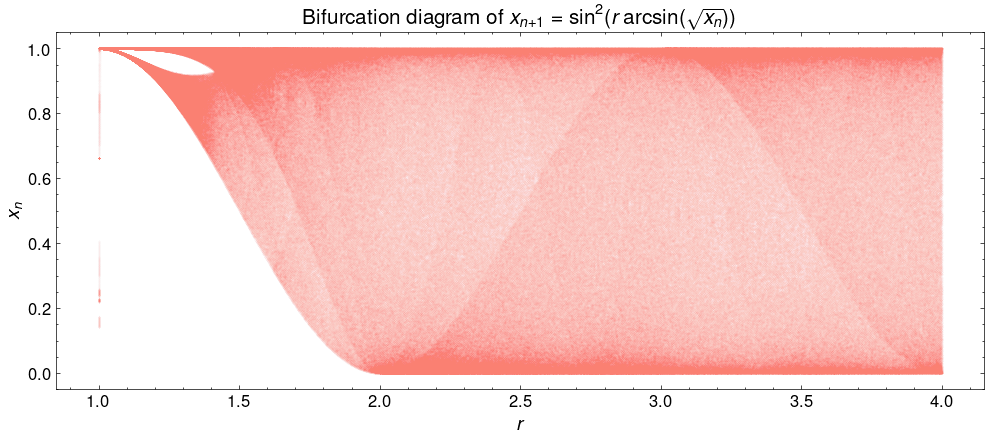

In [ ]:
# Plotting
plt.figure(figsize=(10, 4.5))
plt.scatter(r_values, x_values, s = 0.05, c = 'salmon', alpha = 0.07, marker = '.')
plt.title("Bifurcation diagram of " + r"$x_{n+1} = \sin^2(r\arcsin(\sqrt{x_n}))$", fontsize=15)

plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$x_n$', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

#plt.savefig("5a.pdf", dpi=300, bbox_inches='tight')

plt.show()